In [27]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *
import cv2

from scipy import ndimage, fft
from io import BytesIO

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

In [28]:
k = 3   # kernel size
beta2s = [1, 0, 0.25, 0.5, 0.75, 0.76, 0.7] #[0, 0.25, 0.75, 1]  
activations = [tf.nn.relu]
timestamps = [1,25, 100]
experiment_name = "unipolar_translation_circle"
box_dims = [200, 100]
step =   25 # Plot axis step

In [29]:
tf.nn.relu.__name__

'relu'

In [30]:
3//2

1

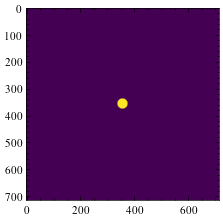

In [31]:
# Single pixel input
d = 715
mid = d//2

img = np.zeros((d,d)) # cv2.imread('input4.png', 0)/255. 


cv2.circle(img,(mid,mid), 19, (255.0), -1)
mid = img.shape[0]//2

plt.imshow(img)

In [32]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
filters = np.zeros((3,3,1,1))
img = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = filters.shape[-2], axis=-1), dtype=tf.float32)

In [34]:
f = tf.cast(np.array([[0,1,0], [0,0,0], [0,0,0]]), tf.float32)
fs, fa = getSymAntiSymTF(tf.reshape(f, (3,3,1,1)))
fs = (fs)/(tf.math.reduce_euclidean_norm(fs))
fa = (fa)/(tf.math.reduce_euclidean_norm(fa))


(fa*(.5)+fs*(0.5))[:,:, 0,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.        , 0.6830127 , 0.        ],
       [0.10566244, 0.        , 0.10566244],
       [0.        , 0.10566244, 0.        ]], dtype=float32)>

50 -50
39 39
4.0 0.0
18.447586
1.0000002
96.58252
120.61987
134.2627
139.13513
141.40894
142.4917
143.03308
143.24963
143.46619
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
0.9999991
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
143.57446
14

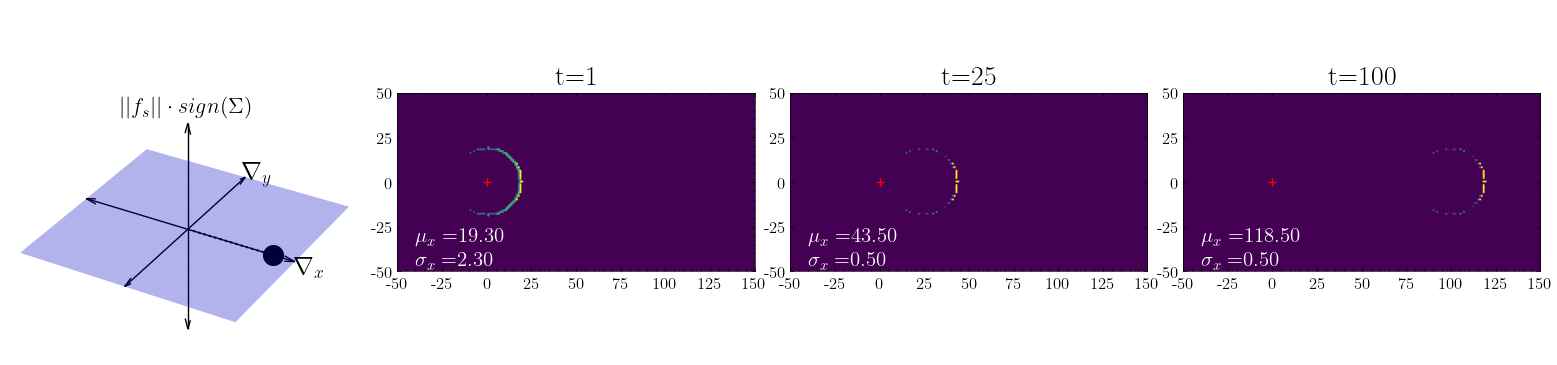

0.0 4.0
42.59375
1.0000002
43.5
43.90625
44.25
44.53125
44.78125
45.0
45.21875
45.40625
45.59375
45.78125
45.9375
46.09375
46.25
46.40625
46.5625
46.71875
46.875
47.0
47.125
47.25
47.375
47.5
47.625
47.75
1.0000001
47.875
48.0
48.125
48.25
48.375
48.5
48.625
48.75
48.875
49.0
49.101562
49.21875
49.320312
49.4375
49.53125
49.65625
49.75
49.84375
49.9375
50.03125
50.125
50.21875
50.3125
50.40625
50.5
50.59375
50.6875
50.78125
50.875
50.96875
51.0625
51.15625
51.25
51.34375
51.4375
51.53125
51.625
51.6875
51.78125
51.84375
51.9375
52.0
52.09375
52.15625
52.25
52.289062
52.375
52.414062
52.5
52.539062
52.625
52.664062
52.75
52.78125
52.875
52.882812
52.96875
52.976562
53.0625
53.070312
53.15625
53.164062
53.25
53.257812
53.34375
53.34375
53.4375
53.4375
53.53125
53.523438
53.59375
53.585938
53.65625
53.648438
53.71875
1.0
53.710938


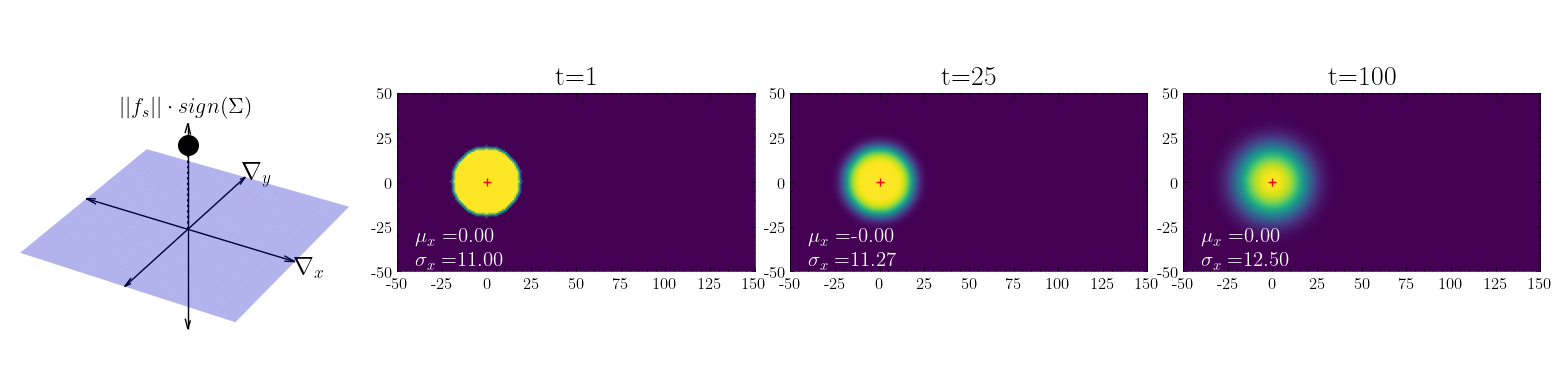

2.0 3.4641016151377544
36.884773
0.9999998
37.58837
37.94017
38.210785
38.427277
38.64377
38.806137
38.968506
39.130875
39.293243
39.42855
39.563858
39.699165
39.834473
39.96978
40.078026
40.18627
40.294518
40.402763
40.51101
40.619255
40.7275
40.835747
40.943993
41.05224
0.9999999
41.160484
41.26873
41.376976
41.48522
41.566406
41.674652
41.755836
41.83702
41.918205
41.99939
42.080574
42.16176
42.242943
42.324127
42.40531
42.486496
42.56768
42.648865
42.73005
42.811234
42.892418
42.973602
43.054787
43.13597
43.217155
43.29383
43.36149
43.433647
43.510323
43.57798
43.65014
43.726814
43.79447
43.86663
43.943306
44.010963
44.074104
44.137245
44.200394
44.263535
44.326675
44.389824
44.452965
44.516106
44.579254
44.642395
44.705536
44.768684
44.81378
44.876923
44.931053
44.97164
45.030273
45.088913
45.13401
45.179108
45.237747
45.273827
45.31894
45.373055
45.404625
45.449722
45.499344
45.539932
45.58503
45.63465
45.661705
45.706818
45.742897
45.76995
45.815063
45.846634
45.878197
45.92331


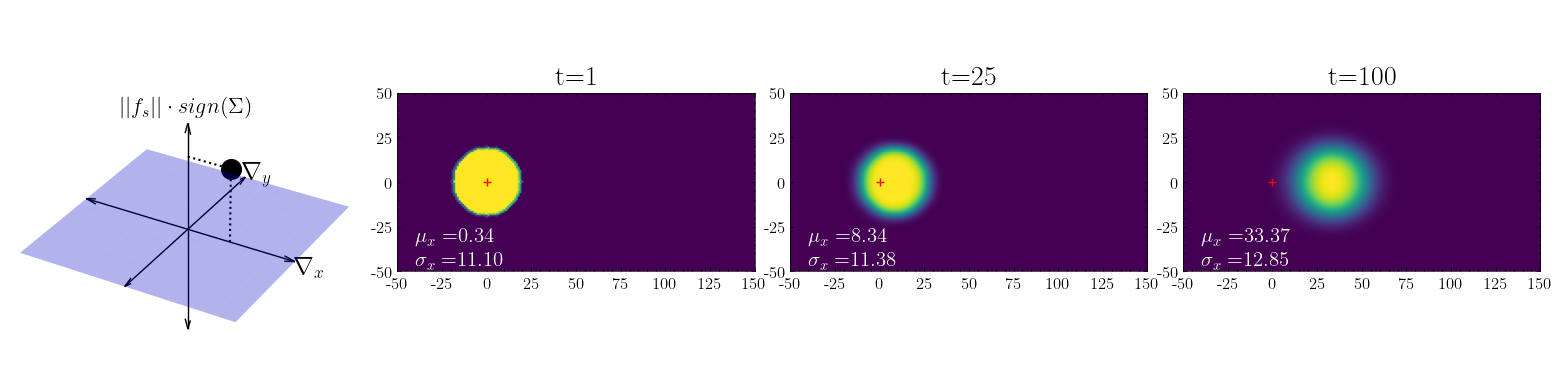

2.8284271247461903 2.8284271247461903
30.115112
0.99999964
30.534912
30.800049
30.998901
31.17566
31.308228
31.440796
31.55127
31.661743
31.772217
31.860596
31.97107
32.05945
32.147827
32.236206
32.324585
32.412964
32.479248
32.567627
32.63391
32.700195
32.76648
32.832764
32.899048
32.965332
0.99999994
33.031616
33.0979
33.164185
33.23047
33.296753
33.363037
33.42932
33.495605
33.56189
33.628174
33.694458
33.760742
33.827026
33.89331
33.954926
34.003784
34.063065
34.10959
34.158447
34.217728
34.261917
34.30844
34.3573
34.40149
34.44568
34.48987
34.534058
34.578247
34.622437
34.666626
34.710815
34.755005
34.799194
34.843384
34.887573
34.931763
34.975952
35.02014
35.06433
35.10852
35.15271
35.1969
35.24109
35.28528
35.329468
35.373657
35.417847
35.462036
35.506226
35.54808
35.589935
35.62712
35.663223
35.70508
35.746933
35.78412
35.81897
35.85974
35.901596
35.93878
35.973633
36.0074
36.04225
36.078354
36.113205
36.144638
36.17949
36.210922
36.248108
36.28296
36.316727
36.351578
36.38768


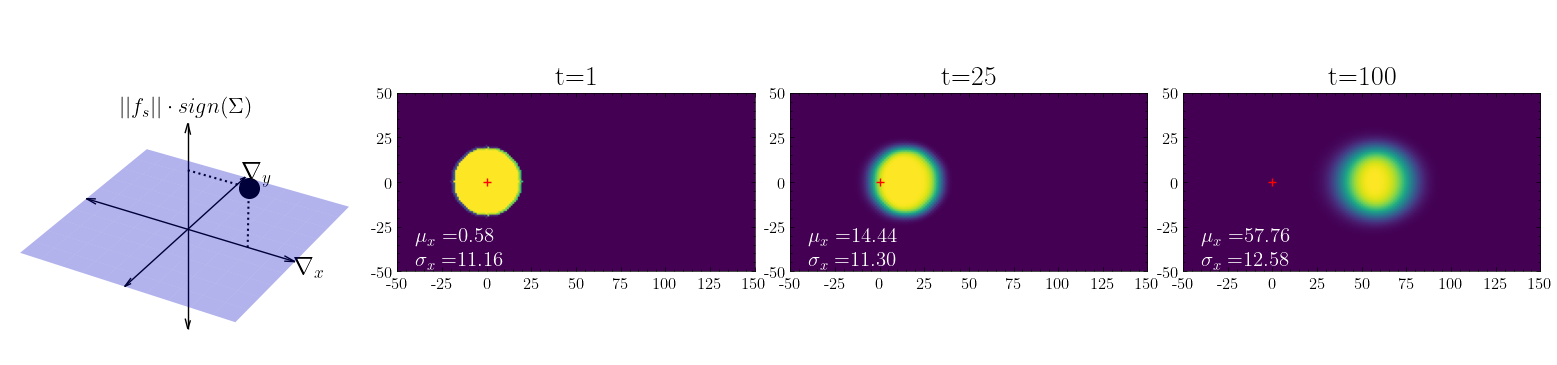

3.4641016151377544 2.0
21.296875
0.9999997
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
0.99999964
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296875
21.296

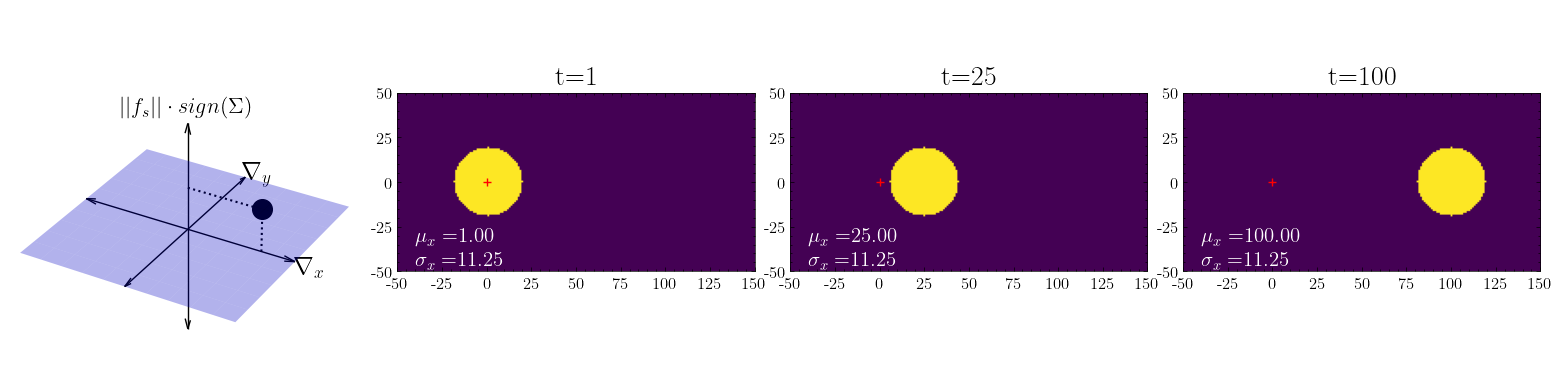

3.4871191548325386 1.9595917942265424
21.296875
0.9999998
21.71875
22.140625
22.578125
23.015625
23.46875
23.921875
24.390625
24.859375
25.328125
25.8125
26.3125
26.828125
27.328125
27.84375
28.375
28.921875
29.484375
30.046875
30.625
31.203125
31.796875
32.40625
33.0
33.625
1.0000002
34.25
34.90625
35.5625
36.21875
36.90625
37.59375
38.28125
38.96875
39.6875
40.40625
41.15625
41.90625
42.6875
43.46875
44.25
45.03125
45.8125
46.625
47.4375
48.28125
49.125
49.96875
50.84375
51.71875
52.59375
53.46875
54.375
55.28125
56.1875
57.125
58.0625
59.0
59.9375
60.875
61.84375
62.8125
63.78125
64.75
65.75
66.75
67.75
68.75
69.75
70.75
71.75
72.75
73.75
74.75
75.75
76.75
77.75
78.75
79.75
80.75
81.75
82.75
83.75
84.75
85.75
86.75
87.75
88.6875
89.6875
90.625
91.625
92.5625
93.5
94.4375
95.375
96.3125
97.25
98.1875
99.125
100.0625
100.9375
1.0000001
101.8125


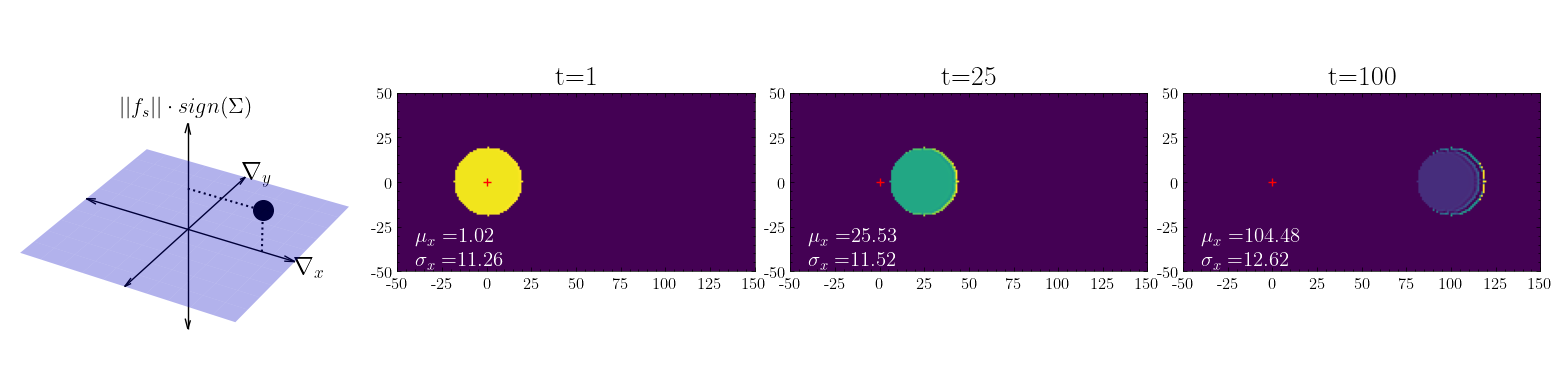

3.3466401061363023 2.1908902300206647
23.332453
0.99999946
23.452282
23.537874
23.623466
23.69194
23.760414
23.828888
23.880243
23.931599
23.982954
24.03431
24.068546
24.119902
24.154139
24.188375
24.222612
24.25685
24.291086
24.325323
24.35956
24.393797
24.428034
24.445152
24.47939
24.513626
1.0000006
24.530745
24.564981
24.5821
24.616337
24.633455
24.667692
24.68481
24.719048
24.736166
24.770403
24.787521
24.80464
24.838877
24.855995
24.873114
24.890232
24.924469
24.941587
24.958706
24.975824
24.992943
25.010061
25.02718
25.044298
25.061417
25.078535
25.095654
25.112772
25.12989
25.147009
25.164127
25.181246
25.198364
25.215483
25.232601
25.24972
25.266838
25.283957
25.301075
25.318193
25.335312
25.35243
25.369549
25.386667
25.403786
25.420904
25.438023
25.455141
25.47226
25.489378
25.506496
25.523615
25.540733
25.557852
25.57497
25.592089
25.609207
25.626326
25.643444
25.660563
25.677681
25.6948
25.711918
25.729036
25.746155
25.763273
25.780392
25.79751
25.814629
25.831747
25.848866

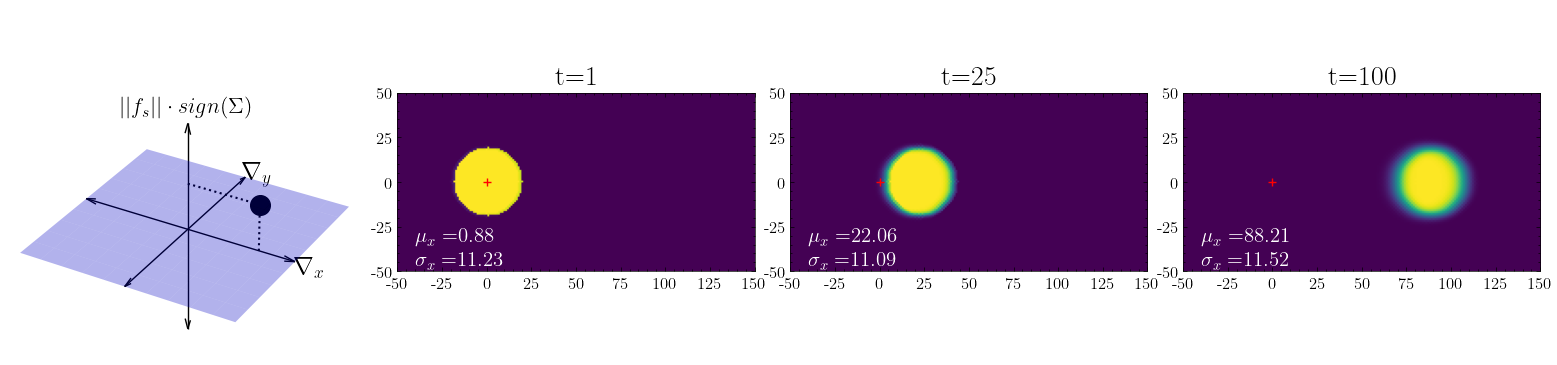

In [35]:
import matplotlib.patches as mpatches



filters = np.zeros((3,3,1,1))



#Get image height and width

vals_x = img[0, img.shape[1]//2, :, :]
vals_y = img[0, :, img.shape[2]//2, :]
nonzeros = np.nonzero(vals_x)[0]
if nonzeros.size > 0:
    length_y = nonzeros[-1] - nonzeros[0] + 1
else:
    length_y = 0  # all zeros
nonzeros = np.nonzero(vals_x)[0]
if nonzeros.size > 0:
    length_x = nonzeros[-1] - nonzeros[0] + 1
else:
    length_x = 0  # all zeros



#step = 2**np.floor(np.log2(( (length_x) + np.max(timestamps) )// 5))


max_x = int(box_dims[0]*(.75))
min_x = -int(box_dims[0]*(.25))

max_y = box_dims[1]//2
min_y = -(box_dims[1]//2)

print(max_y, min_y)
print(length_x, length_y)


for activation in activations:
	for beta2 in beta2s:

		
		images = []

		filters = np.zeros((3,3,1,1))

		t = np.zeros((3,3))
		t[1, 0] = np.sqrt(beta2)
		t[0, 0] = np.sqrt(1-beta2)
		filters = fa*( np.sqrt(beta2)) + fs*( np.sqrt(1-beta2))
		#filters /= np.sum(np.abs(filters))
		
		w =tf.cast(filters, dtype=tf.float32)# tf.expand_dims(filters, -1), dtype=tf.float32)
		w = tf.transpose(w, perm=(1,0,2,3))



		x = img


		directory = f"figures/{experiment_name}_{activation.__name__}_{k}x{k}_{beta2}"
		if not os.path.exists(directory):
			os.makedirs(directory)




		#Generate Plot
		fig = plt.figure(figsize=(16,len(timestamps)+1))
		gs = fig.add_gridspec(1,len(timestamps)+1, wspace=0.1)

		ax0 = fig.add_subplot(gs[0], projection='3d')
		plot_filter_x(beta2, ax = ax0)
		ax0.axis('off')

		#for i, im in enumerate(images):	
		plot_num = 1
		for i in range(timestamps[-1]+1):
			x = x/np.std(x)
			
			if i in timestamps:

				ax = fig.add_subplot(gs[plot_num])
				plot_num+=1
				print(np.std(x))
				vals = x[0, x.shape[1]//2, :, :]
				vals = vals/np.sum(vals)

				pos = np.expand_dims(np.linspace(-(x.shape[1]//2), x.shape[1]//2, x.shape[1]),-1)
				mean = tf.reduce_sum(pos*vals)
				var = tf.reduce_sum(((pos-mean)**2) * vals)
				std = np.sqrt(var)
				#print(mean, np.sqrt(var))
				
				im = ax.imshow(x[0,:,:,0])
				ax.plot(mid, mid, marker = '+', color='red')

				'''arr =  mpatches.FancyArrowPatch((mid, mid), (mid+mean+std, mid),
										mutation_scale=4, shrinkA=0, shrinkB=0,zorder=10, color="red")
				ax.add_patch(arr)'''


				ax.annotate(r'$\sigma_x=$'+f"{std:.2f}", (0.05,0.01), ha='left', va='bottom',color='white', xycoords='axes fraction', fontsize=15)
				ax.annotate(r'$\mu_x=$'+f"{mean:.2f}", (0.05,0.14), ha='left', va='bottom',color='white', xycoords='axes fraction', fontsize=15)
				#ax.annotate(r'$argmax_x=$'+f"{np.argmax(vals)-mid:.2f}", (0.05,.17), ha='left', va='bottom',color='white', xycoords='axes fraction')
				
				#ax.annotate(r'$\sigma=$'+f"{std:.2f}", (.5, 6), xycoords=arr, ha='center', va='bottom',color='white')
				#ax.arrow(, 112, dx=, dy= 0, color='black')




				ax.set(xlim=((mid + min_x, mid+max_x)) , ylim=((mid+min_y, (mid+max_y))))

				# Re-label ticks relative to midpoint
				xticks = ax.get_xticks()
				yticks = ax.get_yticks()

				#ax.set_xticklabels(np.arange(min_x, max_x+1, step=2))
				#ax.set_yticklabels(np.arange(min_y, max_y+1, step=2))
				xticks = np.arange(np.sign(min_x) * (np.abs(min_x)//2)*2, step+(max_x//2)*2, step=step) + mid
				yticks = np.arange(np.sign(min_y) * (np.abs(min_y)//2)*2, step+(max_y//2)*2, step=step) + mid
				ax.set_xticks(xticks)
				ax.set_yticks(yticks)
				ax.tick_params(axis='x', labelsize=12)
				ax.tick_params(axis='y', labelsize=12)


				ax.set_xticklabels([x - mid for x in xticks])
				ax.set_yticklabels([y - mid for y in yticks])



				#ax.set_xticks(np.linspace(-round(std)-1, round(std)+1, int(0.5*(std)+3)))
				#fig.colorbar(im, orientation='vertical')

				'''plt.close(fig) 
				buf = BytesIO()
				fig.savefig(buf, format="svg", dpi=fig.dpi, bbox_inches="tight")
				buf.seek(0)'''



				#ax0.imshow(im)
				#ax.axis('off')
				ax.set_title(f"t={i}", fontsize=20)


				#images.append(Image.open(buf))
				#print(x)

			x = activation( tf.nn.conv2d(x, w , strides=(1,1), 
									padding='SAME') )
			print(np.max(x))


		fig.subplots_adjust(left=0.02, right=0.98, top=0.9, bottom=0.01, wspace=0.1)
		fig.savefig(f"{experiment_name}_{k}x{k}__{activation.__name__}_{beta2}.pdf", format="pdf", dpi=fig.dpi, bbox_inches="tight")
		plt.show()


In [36]:
xticks-mid

array([-50, -25,   0,  25,  50,  75, 100, 125, 150])

In [37]:
mid

357

In [38]:
yticks#-mid

array([307, 332, 357, 382, 407])

In [39]:
step

25